In [1]:
# Name Dipika Sharma
# DSC 540 T302 Data Preparation
# Week 9 and 10
# Project Milestone 4

In [195]:
# Declaring all the libraries I want to use now.

import matplotlib.pyplot as plt

In [196]:
import urllib.request, urllib.parse, urllib.error
import json

In [213]:
import numpy as np
import pandas as pd
import requests
import json

# To access the API response, we use the function call requests.get(url).json() 
# which not only gets the response from the API for the url but also gets the JSON format for it. 

channels_list = []
#url = 'https://data.chhs.ca.gov/api/3/action/datastore_search?resource_id=235174a5-f5b6-4759-8ab9-76191bfea324&limit=5&q=title:jones' 

# Using two variable base and uri, base will remain the same where as uri will be the second part of the url which will change depending upon the amount of data.

base = 'https://data.chhs.ca.gov'
uri = '/api/3/action/datastore_search?resource_id=235174a5-f5b6-4759-8ab9-76191bfea324&limit=78000'
url = base+uri
# we can loop through a list of channels

while  True:
    #count = count - 1;  
    JSONContent = requests.get(url).json()
    if 'error' not in JSONContent:
        content = json.dumps(JSONContent, indent = 4, sort_keys=True)  # using dump to dump data in content variable.
        content_dic =json.loads(content);
        uri = content_dic['result']['_links']['next'];
        url = base+uri;
        records = content_dic['result']['records'];
        print(len(records));
        
        # loop for each row in records.
        for var in records:
            # store information in array channels_list using the append()
            channels_list.append([var['_id'], 
                              var['as_of_date'], var['zip_code_tabulation_area'], var['local_health_jurisdiction'], var['county'],
                            var['vaccine_equity_metric_quartile'], var['vem_source'], var['age12_plus_population'], var['persons_fully_vaccinated'], 
                             var['persons_partially_vaccinated'], var['percent_of_population_fully_vaccinated'], var['percent_of_population_partially_vaccinated'], 
                             var['percent_of_population_with_1_plus_dose'], var['redacted']])

        print(url)
        if len(records) == 0:
            break;



50000
https://data.chhs.ca.gov/api/3/action/datastore_search?offset=50000&limit=78000&resource_id=235174a5-f5b6-4759-8ab9-76191bfea324
27616
https://data.chhs.ca.gov/api/3/action/datastore_search?offset=100000&limit=78000&resource_id=235174a5-f5b6-4759-8ab9-76191bfea324
0
https://data.chhs.ca.gov/api/3/action/datastore_search?offset=150000&limit=78000&resource_id=235174a5-f5b6-4759-8ab9-76191bfea324


In [198]:
# Get information and compile it into a dataset
# using the pandas library to convert array into a pandas Dataframe using the method DataFrame()

dataset = pd.DataFrame(channels_list)

In [199]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,2021-01-05,91902,San Diego,San Diego,4.0,Healthy Places Index Score,16620.7,22.0,372.0,0.001324,0.022382,0.023706,No
1,2,2021-01-05,92410,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,35012.3,None,None,None,None,None,Information redacted in accordance with CA sta...
2,3,2021-01-05,92285,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,2317.1,None,None,None,None,None,Information redacted in accordance with CA sta...
3,4,2021-01-05,95621,Sacramento,Sacramento,2.0,Healthy Places Index Score,36059.1,12.0,412.0,0.000333,0.011426,0.011759,No
4,5,2021-01-05,92656,Orange,Orange,4.0,Healthy Places Index Score,43721.9,None,None,None,None,None,Information redacted in accordance with CA sta...


In [200]:
# Dataframe is created with 14 columns and 77,616 rows.

dataset.shape

(77616, 14)

# Step 1 - Renaming of columns in dataframe

As we can see above all the columns of dataframe is number which do not tell anything about the data. So lets change the columns name to make more sense.

In [201]:
# Renaming columns name.

dataset.columns = ['id', 'as_of_date', 'zip_code_tabulation_area', 'local_health_jurisdiction', 'county', 'vaccine_equity_metric_quartile', 'vem_source', 'age12_plus_population', 
 'persons_fully_vaccinated', 'persons_partially_vaccinated', 'percent_of_population_fully_vaccinated', 'percent_of_population_partially_vaccinated', 'percent_of_population_with_1_plus_dose', 'redacted']


In [202]:
#dataset.dropna(axis = 0, how = 'any', inplace = True)
#dataset.index = pd.RangeIndex(len(dataset.index))

In [204]:
# Data looks more clean and make sense after renaming them.
dataset.head()

,id,as_of_date,zip_code_tabulation_area,local_health_jurisdiction,county,vaccine_equity_metric_quartile,vem_source,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,percent_of_population_fully_vaccinated,percent_of_population_partially_vaccinated,percent_of_population_with_1_plus_dose,redacted
0,1,2021-01-05,91902,San Diego,San Diego,4.0,Healthy Places Index Score,16620.7,22.0,372.0,0.001324,0.022382,0.023706,No
1,2,2021-01-05,92410,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,35012.3,None,None,None,None,None,Information redacted in accordance with CA sta...
2,3,2021-01-05,92285,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,2317.1,None,None,None,None,None,Information redacted in accordance with CA sta...
3,4,2021-01-05,95621,Sacramento,Sacramento,2.0,Healthy Places Index Score,36059.1,12.0,412.0,0.000333,0.011426,0.011759,No
4,5,2021-01-05,92656,Orange,Orange,4.0,Healthy Places Index Score,43721.9,None,None,None,None,None,Information redacted in accordance with CA sta...


# Step 2 - Looking for NULL values in dataframe

In [205]:
# checking the dataframe for null values, below function will count the number of NULL values for each column.
dataset.isnull().sum()

id                                               0
as_of_date                                       0
zip_code_tabulation_area                         0
local_health_jurisdiction                      220
county                                         220
vaccine_equity_metric_quartile                3828
vem_source                                       0
age12_plus_population                            0
persons_fully_vaccinated                      8004
persons_partially_vaccinated                  8004
percent_of_population_fully_vaccinated        8004
percent_of_population_partially_vaccinated    8004
percent_of_population_with_1_plus_dose        8004
redacted                                         0
dtype: int64

As we can see there are multiple columns which has NULL values, At this point of time i do not want to remove NULL values from dataset as it will be too early to make any decision. But it is good to see and have knowledge about your colums data.

# Step 3 - Removing the leading and ending whitespace

In [187]:
# using strip fucntion to remove leading and ending whitespace.

def strip_whitespace(s):
    return s.strip()  # using strip fucntion to remove leading and ending whitespace.

In [206]:
# Lets strip the whitespace if any in zipcode column of the dataset

dataset['zipcode_stripped']=dataset['zip_code_tabulation_area'].apply(strip_whitespace)
dataset['zip_code_tabulation_area']=dataset['zipcode_stripped']
dataset.drop(labels=['zipcode_stripped'],axis=1,inplace=True)

# Step 4 - Check for duplicates

In [207]:
# Lets make sure we do not have any duplicates for columns Zipcode in our dataset

print("Is column ZIPCODE is duplicated? - {}".format(any(dataset.zip_code_tabulation_area.duplicated())))

Is column ZIPCODE is duplicated? - True


As we know our dataset has Covid information of California state and it is expected to have multiple covid cases in one zipcode so we are expecting to have same zipcode multiple times in dataset.

# Step 5 - Check for NaN values

In [190]:
# Lets check few columns of the dataset for NaN Values

print("Is the column ZIPCODE contains NaN values? - %r " % dataset.zip_code_tabulation_area.isnull().values.any())
print("Is the column county contains NaN values? - %r " % dataset.county.isnull().values.any())
print("Is the column as_of_date contains NaN values? - %r " % dataset.as_of_date.isnull().values.any())



Is the column ZIPCODE contains NaN values? - False 
Is the column county contains NaN values? - True 
Is the column as_of_date contains NaN values? - False 


TypeError: can only concatenate str (not "NoneType") to str

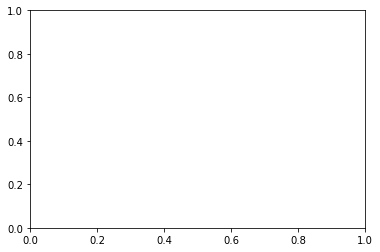

In [208]:
plt.boxplot(dataset.vaccine_equity_metric_quartile, notch=True)

As we can see above that the column zipcode doesnot have any NaN values then it is good. For project we will be looking all california zipcode to see relationship between covid and vaccination so if in case we missing zipcode information in our dataset then we either need to remove that rows or need to look for another dataset with no NaN values.

The good thing is that we do not have any NaN values for zipcode so we will fine and we can look for answers to our questions using the current covid vaccination dataset.

# Step 6 - Replace values

As we can see we have so many "None" values for our numeric columns and it might create problem for us while performaing any calculation on it.
So it will be nice to replcae "None" values with 0 for all numerica columns.

In [216]:
dataset = dataset.replace(np.nan, 0)

In [217]:
dataset.head()

,id,as_of_date,zip_code_tabulation_area,local_health_jurisdiction,county,vaccine_equity_metric_quartile,vem_source,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,percent_of_population_fully_vaccinated,percent_of_population_partially_vaccinated,percent_of_population_with_1_plus_dose,redacted
0,1,2021-01-05,91902,San Diego,San Diego,4.0,Healthy Places Index Score,16620.7,22.0,372.0,0.001324,0.022382,0.023706,No
1,2,2021-01-05,92410,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,35012.3,0,0,0,0,0,Information redacted in accordance with CA sta...
2,3,2021-01-05,92285,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,2317.1,0,0,0,0,0,Information redacted in accordance with CA sta...
3,4,2021-01-05,95621,Sacramento,Sacramento,2.0,Healthy Places Index Score,36059.1,12.0,412.0,0.000333,0.011426,0.011759,No
4,5,2021-01-05,92656,Orange,Orange,4.0,Healthy Places Index Score,43721.9,0,0,0,0,0,Information redacted in accordance with CA sta...


So now we can see 0 in lcae of None in our dataset.

# Step 7 - Convert date column as_of_date to date type

In [218]:
from datetime import datetime

In [221]:
# lets check the datatype for as_of_date column of our dataset.

print (dataset.as_of_date)

0        2021-01-05
1        2021-01-05
2        2021-01-05
3        2021-01-05
4        2021-01-05
            ...    
77611    2021-11-02
77612    2021-11-02
77613    2021-11-02
77614    2021-11-02
77615    2021-11-02
Name: as_of_date, Length: 77616, dtype: object


As we can see as_of_date is string type so we can convert them into date type. Since It would easier for us to process the date column.

In [223]:
# Using to_datetime() & astype() to convert the as_of_date column to date type.

dataset['as_of_date']=pd.to_datetime(dataset['as_of_date'].astype(str), format='%Y/%m/%d')

In [224]:
# lets check the datatype for as_of_date column of our dataset.

print (dataset.as_of_date)

0       2021-01-05
1       2021-01-05
2       2021-01-05
3       2021-01-05
4       2021-01-05
           ...    
77611   2021-11-02
77612   2021-11-02
77613   2021-11-02
77614   2021-11-02
77615   2021-11-02
Name: as_of_date, Length: 77616, dtype: datetime64[ns]


Now the as_of_date column is datetime type.